**FIRE AND SMOKE DATA DETECTION USING YOLO ALGORITHM**

In [ ]:
#installing ultralytics framework
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 81.3 MB/s eta 0:00:00


In [ ]:
#Importing & checking ultralytics framework
import ultralytics

ultralytics.checks()

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.0/112.6 GB disk)


In [ ]:
#Checking Present Working Directory
pwd

'/content'

In [ ]:
#Making a Directory to store dataset
mkdir FireSmokeDetection

In [ ]:
ls

FireSmokeDetection/


In [ ]:
import os
os.chdir("/content/FireSmokeDetection")
%pwd

'/content/FireSmokeDetection'

In [ ]:
pwd

'/content/FireSmokeDetection'

In [ ]:
# Importing dataset from ROBOFLOW using API key
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="B20zXadvb5Jv26GylUpQ")
project = rf.workspace("fireandsmokepart1").project("fireandsmokedataset1")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 92.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FireAndSmokeDataset1-1 in yolov8:: 100%|██████████| 17386/17386 [00:02<00:00, 7436.70it/s]


In [ ]:
#IMPORTANT_STEP
# NOW OPEN THE "data.yaml" file located at "/content/FireSmokeDetection/FireAndSmokeDataset1-1/data.yaml" and give the paths of test,train and validation images
#Perform training after adjusting paths in data.yaml file

In [ ]:
import os
os.chdir("/content/FireSmokeDetection/FireAndSmokeDataset1-1")
%pwd

'/content/FireSmokeDetection/FireAndSmokeDataset1-1'

In [ ]:
#Training YOLOv8 model on my Fire&Smoke dataset imported from roboflow
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=100 imgsz=640 batch=16 name="Smoke&Fire_Detector"

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Smoke&Fire_Detector, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

In [ ]:
#Mounting Google Drive on Colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Saving Fire&SmokeDataset1 directory on Google Drive
!cp -r /content/FireSmokeDetection/FireAndSmokeDataset1-1 /content/drive/MyDrive/

In [ ]:
pwd

'/content'

In [ ]:
#Taking prediction from trained model on an image from test data
!yolo task=detect mode=predict  model="/content/FireSmokeDetection/FireAndSmokeDataset1-1/runs/detect/Smoke&Fire_Detector/weights/best.pt" conf=.25 source="/content/FireSmokeDetection/FireAndSmokeDataset1-1/test/images/NEWFireVideo0_f341_jpg.rf.4a6380129149365ed86cbb7daed7541b.jpg"

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/smoke_fire_pic.jpg: 448x640 1 fire, 69.9ms
Speed: 4.6ms preprocess, 69.9ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# I HAVE USED IMAGES UPLOADED IN MY DRIVE TO DEMONSTRATE DIFFERENCE BETWEEN A
# SIMPLE AND DETECTED IMAGE BY MODEL
# NOTE: This wont work in your system bcz i have used images from my drive

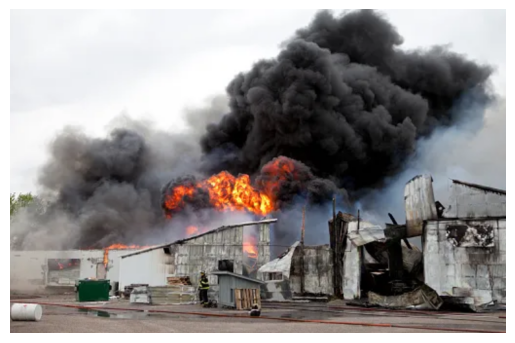

In [1]:
# BEFORE DETECTION
from PIL import Image
import matplotlib.pyplot as plt

# Replace with your actual path
image_path = '/content/drive/MyDrive/Fire_simp.png'

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

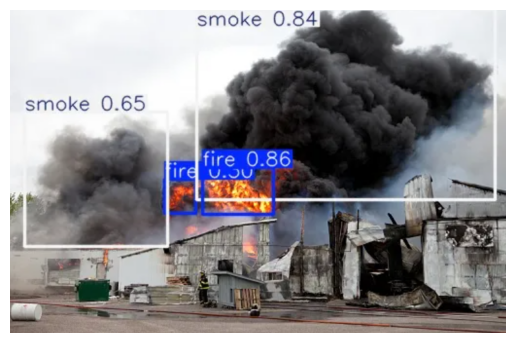

In [2]:
# AFTER DETECTION
from PIL import Image
import matplotlib.pyplot as plt

# Replace with your actual path
image_path = '/content/drive/MyDrive/Fire_detected.png'

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()